## Loading Dataset and libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm
%matplotlib inline

loc1='C:/Users/deshw/Downloads/Datasets ML/multiclass/data_3.txt'
loc2='C:/Users/deshw/Downloads/Datasets ML/multiclass/data_4.txt'
data_1=np.genfromtxt(loc1)
data_2=np.genfromtxt(loc2)

### Building a Classifier

In multiclass, we fit a diiferent set of w and b for each class and classify points according to a calculated value(which may correspond to probablity or the perpendicular distance of the point from the line) given by: 
wx+b.

The value may be called as DECISION FUNCTION VALUE.

In [3]:
def classifier(x,w,b):
    x=x.reshape((1,2))
    variable=np.zeros(len(b))
    variable=x.dot(w.T)+b
    return np.argmax(variable)        

### Training perceptron

In training we define a loss function by wx+b everytime a point is misclassified. Thus by using gradient descent approach for optimization we add x to the w corresponding to true value and deppreciate the w with wrong level by x. In short, we go down the curve of true label thus optimizing the value for true level and go up the curve in case of wrong level to increase the loss.

In [4]:
def train(x,y,max_iter=100):
    k=len(np.unique(y))
    w=np.zeros((k,x.shape[1]))
    b=np.zeros(k)
    converged=True
    done=False
    label=0
    iter=0
    
    while not(done):
        done=True
        ind=np.random.permutation(len(x))
        for i in ind:
            label=classifier(x[i,],w,b)
            
            if (label!=y[i]):
                w[label,]-=x[i,]
                w[y[i],]+=x[i,]
                b[label]-=1
                b[y[i]]+=1
                done=False
        iter+=1    
        if iter>max_iter:
            done=True
            converged=False 
    if converged:
        print('Converged at: ',iter)
    else:
        print('Cannot converge')
            
    return w,b,converged

### Visualization of decision boundaries

In binary Classification we had a line wx+b and putting it to zero we had our decision boundary but in case of multiclass we have multiple vlaues of w which does not act as a decision boundary but corresponds to the decision boundary as decisions are made according to the value(close to distance) from the line. Thus for an acceptable decision boundary we have to take random points to form a grid which are to be classified by the model to give an output which actually responds to the correct decision boundary.

In [5]:
def plot_pcolor(x,y,fun,converged=True):
    plt.figure(figsize=(9,7))
    
    x1_max=max(x[:,0])+1
    x1_min=min(x[:,0])-1
    x2_max=max(x[:,1])+1
    x2_min=min(x[:,1])-1
    
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    
    x1=np.arange(x1_min,x1_max,0.05)
    x2=np.arange(x2_min,x2_max,0.05)
    xx1,xx2=np.meshgrid(x1,x2)
    
    var=np.c_[xx1.ravel(),xx2.ravel()]
    z=np.asanyarray([fun(pt) for pt in var])
    Z=z.reshape(xx1.shape)
    
    k=np.unique(y)
    m=['ro','g^','ko','b^']
    c=['r','g','k','b']
    
    if converged:
        plt.pcolormesh(xx1,xx2,Z,cmap=plt.cm.Pastel1,vmin=0,vmax=len(k))
        
    for i in k:
        plt.plot(x[y==i,0],x[y==i,1],m[i],label='Class %d'%(i))
        
    plt.title('Decision Boundary',weight='bold',fontsize=14)
    plt.xlabel('Feature 1',fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.legend()
    plt.show()
               

### Evaluation of model

In [6]:
def evaluate(data,max_iter=100):
    x=data[:,0:-1]
    y=np.array(data[:,-1],dtype='int')
    w,b,converged=train(x,y)
    fun=lambda pt: classifier(pt,w,b)
     
    if converged:
        plot_pcolor(x,y,fun,converged)

Converged at:  16


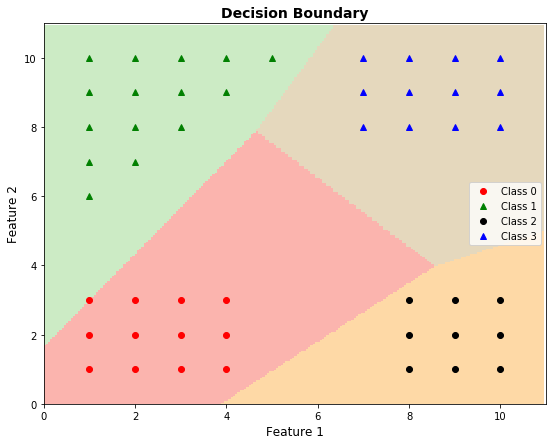

In [7]:
evaluate(data_1)

Converged at:  66


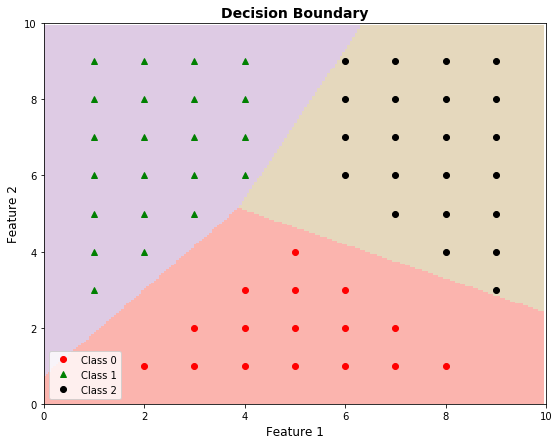

In [8]:
evaluate(data_2)

### Working with SVM

For multi-class we must use 'crammer and singer' as it designs a single classifier for all the class. While 'ovr' or 'one vs rest' builts a different classifier for each class and decides on the basis of decision function value. 'Crammer and singer' is computationally high but is efficient while 'ovr' may cause class imbalance. So, for shorter dataset this approach is quite suitable.

In [52]:
from sklearn import svm
from ipywidgets import interact, interact_manual,IntSlider

@interact_manual(dataset=['data_1','data_2'],c=[0.1,1,10,100,1000,10000],max_iter=[1000,2000,5000,8000,10000])
def fit(dataset,max_iter=1000,c=1.0):
    if dataset=='data_1':
        data=data_1
    else:
        data=data_2
    
    x=data[:,0:-1]
    y=np.array(data[:,-1],dtype='int')

    model=svm.LinearSVC(loss='hinge',multi_class='crammer_singer',max_iter=max_iter,C=c)
    model.fit(x,y)
    fun=lambda pt: model.predict(pt.reshape(1,-1))

    plot_pcolor(x,y,fun,converged)


interactive(children=(Dropdown(description='dataset', options=('data_1', 'data_2'), value='data_1'), Dropdown(…

As seen, in comparison to perceptron SVM is more competent, as margin can be altered with variation in regularization parameter. With increase in C, slackness is decreased thus margin is decreased but the decision boundary is more definite as it passes just between the points.<br>

For hard-margin: C is high - reduced slackness<br>
For soft-margin: C is low - high slackness

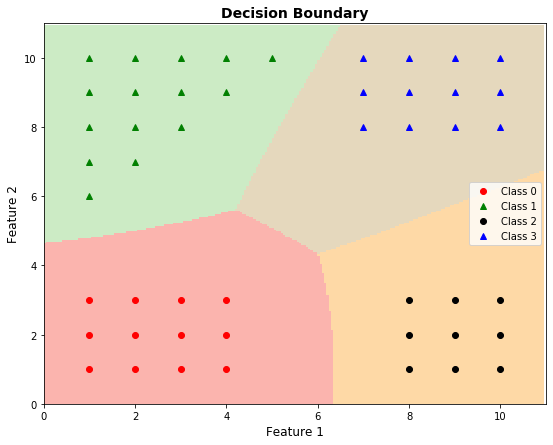

In [68]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=100,solver='newton-cg')
x0=data_1[:,0:-1]
PF=PolynomialFeatures()
x=PF.fit_transform(x0)
y=np.asanyarray(data_1[:,-1],dtype='int')
model.fit(x,y)
converged=True
fun=lambda pt: model.predict(pt.reshape(1,-1))
plot_pcolor1(x0,x,y,fun)



In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
def plot_pcolor1(x0,x,y,fun):
    plt.figure(figsize=(9,7))
    
    x1_max=max(x0[:,0])+1
    x1_min=min(x0[:,0])-1
    x2_max=max(x0[:,1])+1
    x2_min=min(x0[:,1])-1
    
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    
    x1=np.arange(x1_min,x1_max,0.05)
    x2=np.arange(x2_min,x2_max,0.05)
    xx1,xx2=np.meshgrid(x1,x2)
    
    var=np.c_[xx1.ravel(),xx2.ravel()]
    trans=[PF.transform(pt.reshape(1,-1)) for pt in var]
    z=np.asanyarray([fun(pt) for pt in trans])
    Z=z.reshape(xx1.shape)
    
    k=np.unique(y)
    m=['ro','g^','ko','b^']
    c=['r','g','k','b']
    
    if converged:
        plt.pcolormesh(xx1,xx2,Z,cmap=plt.cm.Pastel1,vmin=0,vmax=len(k))
        
    for i in k:
        plt.plot(x0[y==i,0],x0[y==i,1],m[i],label='Class %d'%(i))
        
    plt.title('Decision Boundary',weight='bold',fontsize=14)
    plt.xlabel('Feature 1',fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.legend()
    plt.show()
               